In [1]:
# Imported Modules/Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
# Load the dataset and print shape
pd.set_option('display.max_columns', None)

df = pd.read_csv(r'C:\Users\axelt\Desktop\qsar-modeling\data\QSAR_Final_Dataset.csv') # relative path
print(f'Dataset matrix shape: {df.shape}')

# Note:
# Because we now have p < m that implies that we'll
# now be able to use this dataset because it's been compressed (94%).

Dataset matrix shape: (65, 50)


#### Dataset Compression
The dataset that we received was first analyzed and explored upon. Multicollinearity was found amongst several descriptors, often belonging to the same family of descriptors (i.e. SP-*). Having an expanded family of descriptors increases the dimensionality of our data matrix. We numerically standardized the dataset and removed columns that were not numeric.

The compression of descriptors of the families (where appplicable) was done by taking the highest correlation number with the pIC50 values denoted as $\underbar{y}$ which is our pIC50 vector that will be used for regression for each column.

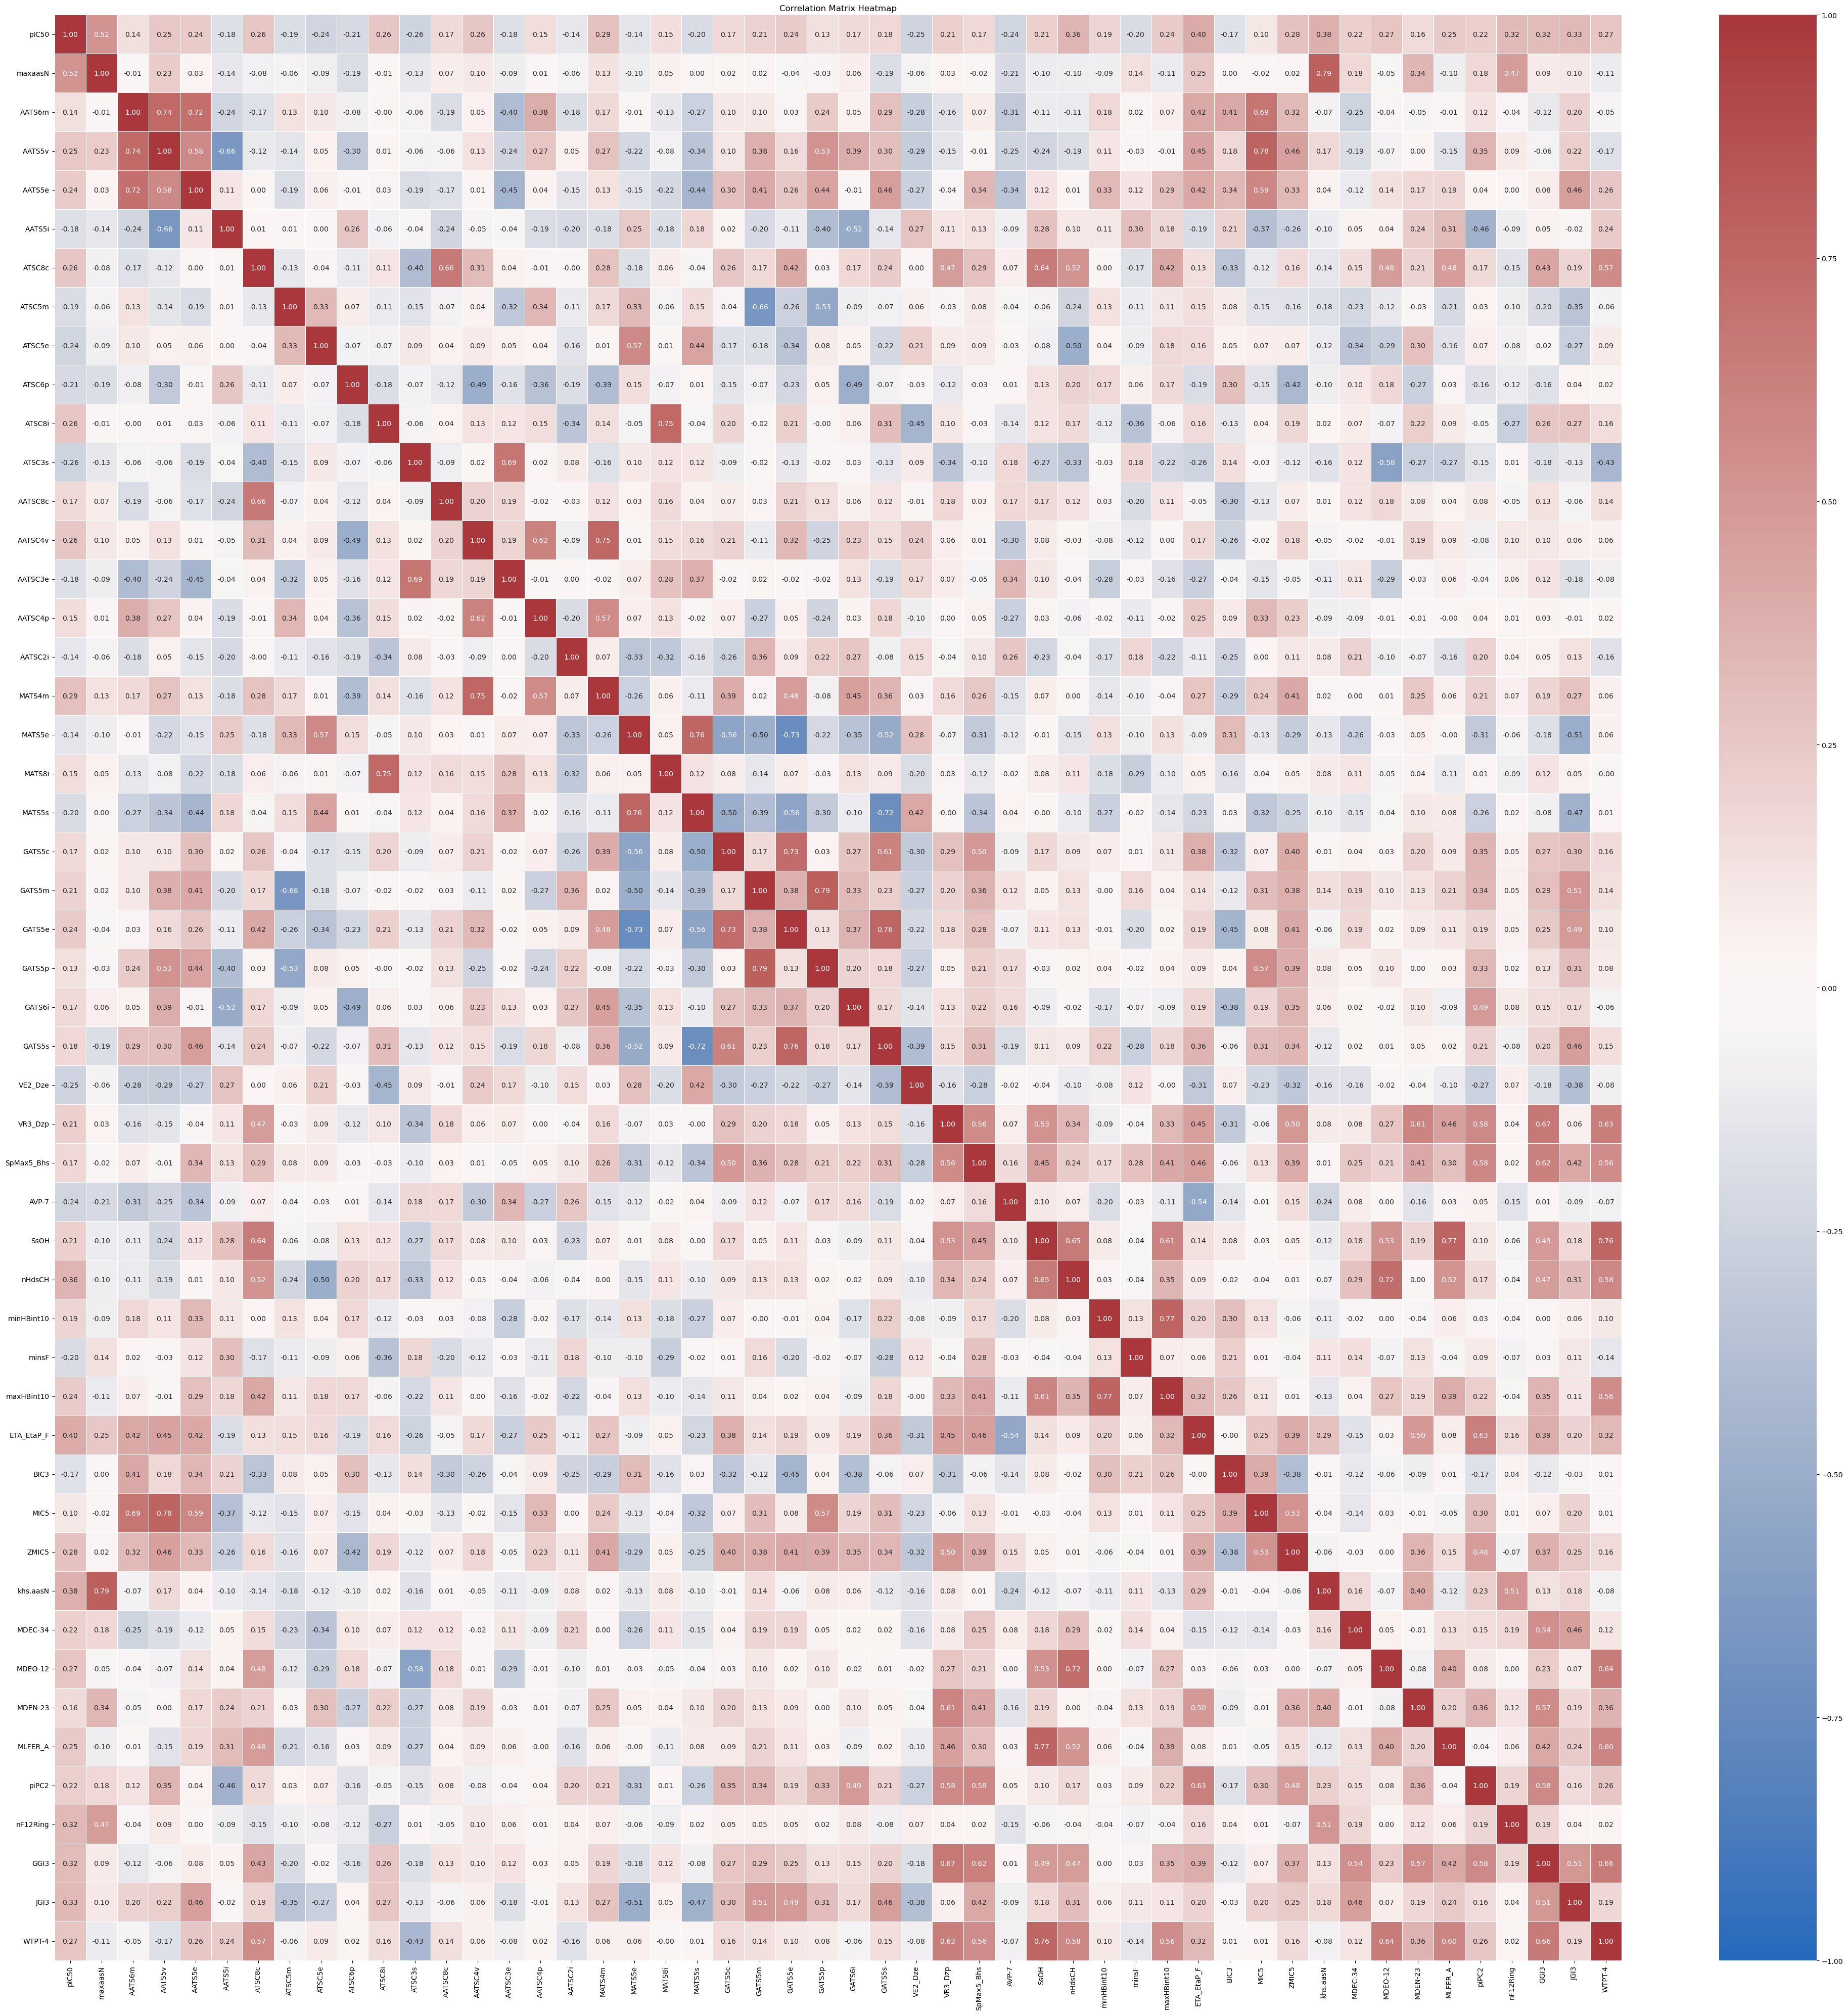

In [8]:
# Final dataset
#X = df.drop('pIC50', axis=1) # our main X matrix
X = df
y = df['pIC50'] # our y (pIC50) vector

corr_matrix = X.corr() 

# 3. Plot the heatmap
plt.figure(figsize=(50, 50)) # Adjust the figure size as needed
sns.heatmap(
    corr_matrix,
    annot=True,       # Annotate the cells with the correlation values
    cmap='vlag',  # Choose a color map (e.g., 'coolwarm', 'vlag', 'RdBu')
    fmt=".2f",        # Format the annotations to two decimal places
    vmin=-1,          # Ensure the color bar goes from -1 to 1
    vmax=1,
    center=0,         # Center the color map at 0 (no correlation)
    linewidths=.5     # Add lines between cells for better readability
)
plt.title('Correlation Matrix Heatmap')
plt.show() # Display the plot

In [10]:
"""
CORRELATION VALUES FOR DROPPED FEATURES
=========================================

Total Dropped: 38 features
- Weak predictors (|correlation| < 0.1): 2
- Redundant predictors (correlation > 0.8 with another feature): 36

WEAK PREDICTORS
---------------
Features with correlation to pIC50 < 0.1

Feature         Correlation
-------         -----------
IC0             0.0956
AATSC4m         0.0899


REDUNDANT PREDICTORS
--------------------
Features dropped due to high correlation (>0.8) with another feature.
Sorted by correlation with pIC50 (highest to lowest).

Rank  Feature         Corr w/ pIC50   Reason for Dropping
----  -------         -------------   -------------------
1     SHdsCH          0.3500          Redundant with nHdsCH (0.357)
2     ATS5m           0.2584          Redundant with multiple features
3     VE2_Dzi        -0.2410          Redundant with VE2_Dze (0.247)
4     ATSC4v          0.2403          Redundant with AATSC4v (0.264)
5     MATS4v          0.2344          Redundant with AATSC4v (0.264)
6     ATS4s           0.2343          Redundant with ATS5m
7     ATS5v           0.2298          Redundant with ATS5m
8     SpMax4_Bhv      0.2170          Redundant with other Bh features
9     ATS6p           0.2165          Redundant with ATS5m
10    MPC4            0.2159          Redundant with piPC2 (0.221)
11    SP-2            0.2149          Redundant with ATS5m (inter-corr: 0.891)
12    MWC10           0.2148          Redundant with other features
13    AATS5s          0.2092          Redundant with AATS5e (0.240)
14    SpMax4_Bhp      0.2072          Redundant with other Bh features
15    SRW10           0.2070          Redundant with other features
16    VR3_Dzm         0.2044          Redundant with VR3_Dzp (0.213)
17    VR3_DzZ         0.2044          Redundant with VR3_Dzp (inter-corr: 1.000)
18    SpMax4_Bhe      0.2037          Redundant with other Bh features
19    nsOH            0.2000          Redundant with SsOH
20    VR3_Dzv         0.1977          Redundant with VR3_Dzp
21    MATS4p          0.1955          Redundant with AATSC4v
22    ATS6e           0.1940          Redundant with ATS5m
23    AATSC5s        -0.1938          Redundant with MATS5s (0.198)
24    maxsF          -0.1938          Redundant with minsF
25    VR3_Dzs         0.1912          Redundant with VR3_Dzp
26    ATS6i           0.1830          Redundant with ATS5m
27    VP-0            0.1811          Redundant with ATS5m (inter-corr: 0.921)
28    SpMax4_Bhi      0.1802          Redundant with other Bh features
29    GATS4v         -0.1761          Redundant with AATSC4v
30    SpMax6_Bhm      0.1729          Redundant with other Bh features
31    TIC0            0.1692          Redundant with other IC features
32    AATS6p          0.1565          Redundant with AATS5v
33    ASP-3          -0.1554          Redundant with other features
34    CIC3            0.1423          Redundant with BIC3
35    MATS8c          0.1336          Redundant with AATSC8c (0.170)
36    SIC3           -0.1272          Redundant with other IC features

STATISTICS
----------
Correlation range: -0.2410 to 0.3500
Mean correlation:  0.1384
Median correlation: 0.1996

Note: Negative correlations indicate inverse relationships with pIC50.
      The sign doesn't matter for redundancy detection (we use absolute values).

DECISION CRITERIA
-----------------
1. Weak Predictor Rule:
   - If |correlation with pIC50| < 0.1 → DROP
   
2. Redundancy Rule:
   - If correlation between Feature_A and Feature_B > 0.8:
     * Compare both features' correlation with pIC50
     * Keep the feature with HIGHER |correlation|
     * Drop the other

# Result: 87 features → 49 features

EXAMPLES OF REDUNDANT PAIRS
----------------------------
Feature_A    Feature_B    Inter-Correlation    A→pIC50    B→pIC50    Keep
---------    ---------    -----------------    -------    -------    ----
VR3_DzZ      VR3_Dzp      1.000                0.204      0.213      VR3_Dzp
VP-0         ATS5m        0.921                0.181      0.258      ATS5m
MATS4v       AATSC4v      0.994                0.234      0.264      AATSC4v
AATSC4m      AATSC4p      0.915                0.090      0.152      AATSC4p
MATS8c       AATSC8c      0.908                0.134      0.170      AATSC8c
GATS4v       AATSC4v      0.900                0.176      0.264      AATSC4v
SP-2         ATS5m        0.891                0.215      0.258      ATS5m
AATS6p       AATS5v       0.892                0.157      0.254      AATS5v
ATS5v        ATS5m        0.883                0.230      0.258      ATS5m
ATS6p        ATS5m        0.883                0.217      0.258      ATS5m

KEY INSIGHTS
------------
1. Not all dropped features are weak - many have decent correlations (>0.2)
2. SP-2 (corr: 0.215) was dropped because it's 89% correlated with ATS5m (corr: 0.258)
3. SHdsCH (corr: 0.350) was dropped because nHdsCH is slightly better (0.357)
4. VR3_DzZ and VR3_Dzp are perfectly correlated (1.000) - only need one
5. The strategy keeps the best predictor from each redundant group

FINAL DATASET
-------------
Original: 65 samples x 88 columns (pIC50 + 87 features)
Cleaned:  65 samples x 50 columns (pIC50 + 49 features)
Removed:  38 features (2 weak + 36 redundant)
"""
features_to_drop = ['AATS5s', 'AATS6p', 'AATSC4m', 'AATSC5s', 'ASP-3', 
                    'ATS4s', 'ATS5m', 'ATS5v', 'ATS6e', 'ATS6i', 'ATS6p', 
                    'ATSC4v', 'CIC3', 'GATS4v', 'IC0', 'MATS4p', 'MATS4v', 
                    'MATS8c', 'MPC4', 'MWC10', 'SHdsCH', 'SIC3', 'SP-2', 
                    'SRW10', 'SpMax4_Bhe', 'SpMax4_Bhi', 'SpMax4_Bhp', 
                    'SpMax4_Bhv', 'SpMax6_Bhm', 'TIC0', 'VE2_Dzi', 'VP-0', 
                    'VR3_DzZ', 'VR3_Dzm', 'VR3_Dzs', 'VR3_Dzv', 'maxsF', 'nsOH']
"""
df_clean = df.drop(columns=features_to_drop)

print(f"Before: {df.shape}")
print(f"After: {df_clean.shape}")

df_clean.to_csv('QSAR_Final_Dataset.csv', index=False)
"""

# The code above is no longer necesary because we've extracted the clean dataset (QSAR_Final_Dataset)


'\ndf_clean = df.drop(columns=features_to_drop)\n\nprint(f"Before: {df.shape}")\nprint(f"After: {df_clean.shape}")\n\ndf_clean.to_csv(\'QSAR_Final_Dataset.csv\', index=False)\n'